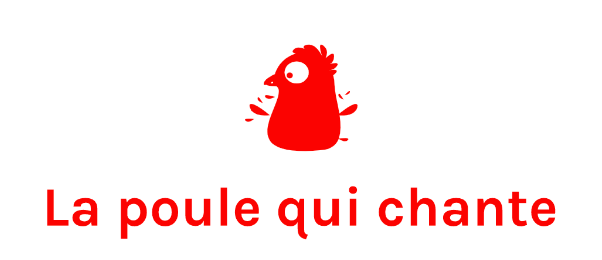

In [4]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# import user-created functions
from functions import *

# use company logo colour in graphs
col = findColor('poule.png')

# maximise dataframe display
pd.set_option('display.max_colwidth', None)

# 1 - Import des donnees fournies et verification du typage des colonnes

In [5]:
# import data files provided by project team
dispo_alim = pd.read_csv('../poule-qui-chante/src/data/raw_data/DisponibiliteAlimentaire_2017.csv', encoding='UTF8')
pop = pd.read_csv('../poule-qui-chante/src/data/raw_data/Population_2000_2018.csv', encoding='UTF8')

In [6]:
dispo_alim.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [7]:
pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


#### Les donnees contenues dans les fichiers fournis sont trop anciennes (5 ans ou plus), nous telechargeons donc les fichiers mis a jour sur le site de la FAO, et des donnees complementaires sur le site Our World In Data. Apres consultation des divers historiques presents en ligne, l'annee la plus recente pour laquelle nous pouvons obtenir un jeu de donnees complet est 2020, a l'exception des chiffres de deces imputables a l'obesite, qui datent de 2019.

In [8]:
# 1.1 - list of countries with various grouping references - source : https://www.fao.org/faostat/en/#definitions
countries = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_5-3-2023_country_groups_2023.csv', encoding='UTF8')

# 1.2 - population - source : https://www.fao.org/faostat/en/#data/OA
pop = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-8-2023_pop_2020.csv', encoding='UTF8')

# 1.3 - GDP - source : https://www.fao.org/faostat/en/#data/MK
gdp = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-10-2023_GDP_2020.csv', encoding='UTF8')

# 1.4 - poultry products trade - source : https://www.fao.org/faostat/en/#data/TCL
trade = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-8-2023_poultry_trade_2020.csv', encoding='UTF8')

# 1.5 - food stability, macro-economic and political stability indicators - source : https://www.fao.org/faostat/en/#data/FS
stability = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-8-2023_stability_2020.csv', encoding='UTF8')

# 1.6 - sources & uses of domestic availability of poultry products - source : https://www.fao.org/faostat/en/#data/SCL
dispo = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-8-2023_poultry_utilisation_2020.csv', encoding='UTF8')

# 1.7 - total availability of protein - source : https://www.fao.org/faostat/en/#data/SCL
protein = pd.read_csv('../poule-qui-chante/src/data/raw_data/FAOSTAT_data_en_5-9-2023_protein_tot_2020.csv', encoding='UTF8')

# 1.8 - animal protein consumption - # source : https://ourworldindata.org/grapher/animal-protein-vs-gdp
protein_anim = pd.read_csv('../poule-qui-chante/src/data/raw_data/OWID_animal-protein-vs-gdp_2020.csv', encoding='UTF8')

# 1.9 - deaths attributed to obesity - source : https://ourworldindata.org/obesity
obesity = pd.read_csv('../poule-qui-chante/src/data/raw_data/OWID_share-of-deaths-obesity_2019.csv', encoding='UTF8')

# 1.10 - trade as a percentage of GDP - source : https://ourworldindata.org/trade-and-globalization
open_economy = pd.read_csv('../poule-qui-chante/src/data/raw_data/OWID_trade-as-share-of-gdp_2020.csv', encoding='UTF8')

## 1.1 - Liste des pays

In [9]:
countries.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,233,Burkina Faso,854.0,BF,BFA


In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Group Code  1964 non-null   int64  
 1   Country Group       1964 non-null   object 
 2   Country Code        1964 non-null   int64  
 3   Country             1964 non-null   object 
 4   M49 Code            1964 non-null   float64
 5   ISO2 Code           1956 non-null   object 
 6   ISO3 Code           1964 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 107.5+ KB


In [11]:
countries['Country Group'].unique()

array(['Africa', 'Americas', 'Annex I countries', 'Antarctic Region',
       'Asia', 'Australia and New Zealand', 'Caribbean',
       'Caucasus and Central Asia', 'Central America', 'Central Asia',
       'Central Asia and Southern Asia', 'Eastern Africa', 'Eastern Asia',
       'Eastern Asia (excluding Japan and China)',
       'Eastern Asia (excluding Japan)',
       'Eastern Asia and South-eastern Asia', 'Eastern Europe', 'Europe',
       'European Union (27)', 'High-income economies',
       'Land Locked Developing Countries',
       'Latin America and the Caribbean', 'Least Developed Countries',
       'Low income economies', 'Low Income Food Deficit Countries',
       'Lower-middle-income economies', 'Melanesia', 'Micronesia',
       'Middle Africa', 'Net Food Importing Developing Countries',
       'Non-Annex I countries', 'North and Central America',
       'Northern Africa', 'Northern Africa (excluding Sudan)',
       'Northern America', 'Northern America and Europe',
       '

In [12]:
# reduce list to countries in "world" group and select name and ISO3 identifier columns
countries_list = countries.loc[countries["Country Group"] == 'World'][['Country','ISO3 Code', 'Country Group']]
countries_dup = countries_list[countries_list['Country'].duplicated() == True]
countries_dup

,Country,ISO3 Code,Country Group
1733,China,F351,World
1737,"China, mainland",F41,World


In [13]:
# identify duplicate countries
dup_countries = countries_list.loc[(countries_list['Country'] == 'China') | (countries_list['Country'] == 'China, mainland')]
dup_countries

,Country,ISO3 Code,Country Group
1732,China,CHN,World
1733,China,F351,World
1736,"China, mainland",CHN,World
1737,"China, mainland",F41,World


In [14]:
# identify duplicate ISO3 identifiers
ISO3_dup = countries_list[countries_list['ISO3 Code'].duplicated() == True]
ISO3_dup

,Country,ISO3 Code,Country Group
1736,"China, mainland",CHN,World
1774,French Guyana,GUF,World
1897,Saint-Martin (French part),MAF,World


In [15]:
# identify country names corresponding to duplicated ISO3 identifiers
dup_iso = countries_list.loc[(countries_list['ISO3 Code'] == 'CHN') | (countries_list['ISO3 Code'] == 'GUF')
                            | (countries_list['ISO3 Code'] == 'MAF')]
dup_iso

,Country,ISO3 Code,Country Group
1732,China,CHN,World
1736,"China, mainland",CHN,World
1773,French Guiana,GUF,World
1774,French Guyana,GUF,World
1894,Saint Martin (French part),MAF,World
1897,Saint-Martin (French part),MAF,World


#### Tous les ISO3 dupliques correspondent a des dependances territoriales francaises ou a un doublon (China, qui regroupe en fait les donnees de la Chine Continentale, Hong Kong, Taiwan et Macao) et que nous eliminerons donc.

In [16]:
# Identify unique country names in "World" countries list
country = countries_list['Country'].unique()
country

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean, unspecified (population)', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chagos Archipelago',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (

#### Un certain nombre de "pays" doivent etre retires de la liste, soit parcequ'ils ne sont en fait pas des pays mais des territoires dependant d'autres pays, ou alors parcequ'ils sont des duplicatas ou n'existent plus.
#### On retire egalement les pays sur la liste noire du FATF-GAFI faisant l'objet d'un embargo international, et la Russie qui a interdit l'import de viandes europeennes (entre autres) depuis 2014 (suite aux sanctions imposees par l'UE a la Russie apres l'invasion de la Crimee).

#### The following territories are removed from the list :
##### 'France' : As the company is targeting only export markets
##### Australian territories : 'Heard and McDonald Islands', 'Norfolk Island', 'Christmas Island' and 'Cocos (Keeling) Islands' ;
##### British territories : 'Anguilla', 'British Virgin Islands', 'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar', 'Guernsey', 'Isle of Man', 'Jersey', 'Montserrat', 'South Georgia and the South Sandwich Islands', 'Saint Helena, Ascension and Tristan da Cunha' and 'Pitcairn' ;
##### Danish territories : 'Faroe Islands' and 'Greenland' ;
##### Duplicates : 'Germany Fr', 'Germany Nl', 'China', 'Sudan (former)', 'Yemen Ar Rp' and 'Yemen Dem';
##### Dutch territories : 'Netherlands Antilles (former)', 'Sint Maarten (Dutch part)', 'Bonaire, Sint Eustatius and Saba', 'Aruba' and 'Curaçao' ;
##### Finnish territory : 'Åland Islands' ;
##### French territories : 'French Guiana', 'French Guyana', 'French Polynesia', 'French Southern Territories', 'Guadeloupe', 'Martinique', 'Mayotte', 'Réunion', 'Saint Barthélemy', 'New Caledonia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint-Martin (French part)' and 'Wallis and Futuna Islands' ;
##### Mauritian territory : 'Chagos Archipelago' ;
##### No longer exist : 'Ethiopia PDR' (since 1991), 'USSR' (since 1991) and 'Pacific Islands Trust Territory' (since 1994) ;
##### Norwegian territories : 'Svalbard and Jan Mayen Islands' and 'Bouvet Island' ;
##### Not actual countries : 'Antarctica', 'Belgium-Luxembourg', 'Caribbean, unspecified (population)', 'Micronesia, unspecified', 'Northern America, unspecified (population)', 'Northern Europe, unspecified (population)', 'Polynesia, unspecified', 'Serbia and Montenegro', 'Western Africa, unspecified', 'Western Europe, unspecified (population)', 'Western Sahara', 'South America, unspecified', and 'Southern Europe, unspecified' ;
##### Turkish & Greek territory : 'Cyprus' ;
##### US territories : 'American Samoa', 'Guam', 'Johnston Island', 'Midway Island', 'United States Minor Outlying Islands', 'United States Virgin Islands', 'Wake Island', 'Northern Mariana Islands' and 'Puerto Rico' ;
##### Countries on the FATF "black list" : 'Iran (Islamic Republic of)', 'Myanmar', and "Democratic People's Republic of Korea" (Source : https://www.fatf-gafi.org/en/publications/High-risk-and-other-monitored-jurisdictions)
##### Embargo on imports of EU meat since 2014 : Russian Federation


In [17]:
# list of "countries" that need removing from "world" list
countries_out = ('Åland Islands','American Samoa','Anguilla','Antarctica','Aruba','Belgium-Luxembourg',
                 'Bonaire, Sint Eustatius and Saba','Bouvet Island','British Virgin Islands',
                 'Caribbean, unspecified (population)','Chagos Archipelago', 'Channel Islands','China','Christmas Island',
                 'Cocos (Keeling) Islands','Curaçao','Cyprus',"Democratic People's Republic of Korea",'Ethiopia PDR',
                 'Falkland Islands (Malvinas)','Faroe Islands','France','French Guiana','French Guyana','French Polynesia',
                 'French Southern Territories','Germany Fr','Germany Nl','Gibraltar','Greenland','Guadeloupe',
                 'Guam','Guernsey',
                 'Heard and McDonald Islands','Iran (Islamic Republic of)', 'Isle of Man','Jersey','Johnston Island','Martinique','Mayotte',
                 'Micronesia, unspecified','Midway Island','Montserrat','Myanmar','Netherlands Antilles (former)','New Caledonia',
                 'Norfolk Island','Northern America, unspecified (population)','Northern Europe, unspecified (population)',
                 'Northern Mariana Islands','Pacific Islands Trust Territory','Pitcairn','Polynesia, unspecified','Puerto Rico',
                 'Réunion', 'Russian Federation',
                 'Saint Barthélemy','Saint Helena, Ascension and Tristan da Cunha','Saint Martin (French part)',
                 'Saint Pierre and Miquelon','Saint-Martin (French part)','Serbia and Montenegro','Sint Maarten (Dutch part)',
                 'South America, unspecified','South Georgia and the South Sandwich Islands','Southern Europe, unspecified',
                 'Sudan (former)','Svalbard and Jan Mayen Islands','United States Minor Outlying Islands',
                 'United States Virgin Islands','USSR','Wake Island','Wallis and Futuna Islands','Western Africa, unspecified',
                 'Western Europe, unspecified (population)','Western Sahara','Yemen Ar Rp','Yemen Dem')

#### Parmi ces pays, un certain nombre sont des pays insulaires isoles a faible pouvoir economique. Compte-tenu des perspectives commerciales limitees offertes par ces pays et du cout d'acheminement d'une denree telle que le poulet (qui doit etre refrigeree ou congelee), particulierement dans un contexte de cout de l'energie croissante et de forte augmentation des couts du shipping international par container, nous choisissons d'eliminer ces pays de la liste.

In [18]:
# create lists of small island devoloping countries for removal from analysis
small_islands = countries.loc[countries['Country Group'] == 'Small Island Developing States']
small_islands_list = small_islands['Country'].unique().tolist()

In [19]:
# remove countries in list above and keep only correct ISO3 codes (3 letters and no digits)
# https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3
countries_trim = countries_list.loc[(countries_list['Country'].isin(countries_out) == False)
                                    & (countries_list['Country'].isin(small_islands_list) == False)
                                   & countries_list['ISO3 Code'].str.isalpha() == True].copy()
# rename columns
countries_trim.rename(columns={'Country': 'country', 'ISO3 Code':'iso3'}, inplace=True)

In [20]:
# check absence of duplicates in countries names
countries_dup2 = countries_trim[countries_trim['country'].duplicated() == True]
countries_dup2

,country,iso3,Country Group


In [21]:
# check if country name is a primary key
isCandKey(countries_trim, 'country')

country est une clé candidate.


True

In [22]:
# check absence of duplicates in ISO3 codes
iso3_dup2 = countries_trim[countries_trim['iso3'].duplicated() == True]
iso3_dup2

,country,iso3,Country Group


In [23]:
# check if ISO3 code is a primary key
isCandKey(countries_trim, 'iso3')

iso3 est une clé candidate.


True

#### Les pays et les codes ISO sont uniques, ces 2 colonnes constituent chacune une cle primaire pour la table countries_trim. Les noms des pays n'etant pas standardises pour toutes les sources de donnees utilisees, nous utiliserons le code ISO3 pour faire des jointures sur les tables ne provenant pas de la FAO.

In [24]:
# type casting
countries_trim['country'] = countries_trim['country'].astype('category')
countries_trim['iso3'] = countries_trim['iso3'].astype('category')

In [25]:
print ("Il y a",countries_trim['country'].nunique(), "pays dans la liste.")
if (countries_trim.loc[countries_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 155 pays dans la liste.
Aucun doublon dans la table.


## 1.2 - Population

In [26]:
pop.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2020,2020,1000 persons,38972.230,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2020,2020,1000 persons,19692.301,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2020,2020,1000 persons,19279.930,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2020,2020,1000 persons,28150.604,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,2020,2020,1000 persons,9904.337,X,Figure from international organizations,NaN


In [27]:
pop['Element'].unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [28]:
# keep only total and urban population columns
pop_tr = pop.loc[(pop['Element'] == 'Total Population - Both sexes')
                | (pop['Element'] == 'Urban population')][['Area','Element','Value']]
pop_tr.head()

,Area,Element,Value
0,Afghanistan,Total Population - Both sexes,38972.230
4,Afghanistan,Urban population,9904.337
5,Albania,Total Population - Both sexes,2866.849
9,Albania,Urban population,1827.362
10,Algeria,Total Population - Both sexes,43451.666


In [29]:
# convert values in inhabitants instead of thousands of inhabitants
pop_tr['Value'] = pop_tr['Value'] * 1000
pop_tr.head()

,Area,Element,Value
0,Afghanistan,Total Population - Both sexes,38972230.0
4,Afghanistan,Urban population,9904337.0
5,Albania,Total Population - Both sexes,2866849.0
9,Albania,Urban population,1827362.0
10,Algeria,Total Population - Both sexes,43451666.0


In [30]:
# type casting and renaming columns
pop_tr['Value'] = pop_tr['Value'].astype(int)
pop_tr['Area'] = pop_tr['Area'].astype(str)
pop_tr['Element'] = pop_tr['Element'].astype(str)
pop_tr.rename(columns={'Area': 'country_pop', 'Value':'millions_pop'}, inplace=True)
pop_tr.head()

,country_pop,Element,millions_pop
0,Afghanistan,Total Population - Both sexes,38972230
4,Afghanistan,Urban population,9904337
5,Albania,Total Population - Both sexes,2866849
9,Albania,Urban population,1827362
10,Algeria,Total Population - Both sexes,43451666


In [31]:
# display information on 1 single line for each country
pop_trim = pop_tr.pivot(index='country_pop', columns='Element', values='millions_pop').reset_index()
pop_trim.rename(columns={'Total Population - Both sexes': 'total_pop', 'Urban population':'urban_pop'}, inplace=True)
pop_trim['country_pop'] = pop_trim['country_pop'].astype('category')
pop_trim.head()

Element,country_pop,total_pop,urban_pop
0,Afghanistan,38972230.0,9904337.0
1,Albania,2866849.0,1827362.0
2,Algeria,43451666.0,31950910.0
3,American Samoa,46189.0,48630.0
4,Andorra,77700.0,67857.0


In [32]:
print ("Il y a",pop_trim['country_pop'].nunique(), "pays dans le fichier de population.")
if (pop_trim.loc[pop_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 236 pays dans le fichier de population.
Aucun doublon dans la table.


## 1.3 - GDP

In [33]:
gdp.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2020,2020,millions,20143.441790,X,Figure from international organizations,NaN
1,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2020,2020,US$,516.866543,X,Figure from international organizations,NaN
2,MK,Macro Indicators,4,Afghanistan,6129,Annual growth US$,22008,Gross Domestic Product,2020,2020,%,6.553742,X,Figure from international organizations,NaN
3,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22011,Gross National Income,2020,2020,millions,20332.383760,X,Figure from international organizations,NaN
4,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22011,Gross National Income,2020,2020,US$,521.714661,X,Figure from international organizations,NaN


In [34]:
gdp['Item'].unique()

array(['Gross Domestic Product', 'Gross National Income'], dtype=object)

In [35]:
gdp['Element'].unique()

array(['Value US$', 'Value US$ per capita', 'Annual growth US$'],
      dtype=object)

In [36]:
# keep only GDP growth and GDP per capita columns
gdp_tr = gdp.loc[((gdp['Element'] == 'Value US$ per capita') & (gdp['Item'] == 'Gross Domestic Product'))
                |((gdp['Element'] == 'Annual growth US$') & (gdp['Item'] == 'Gross Domestic Product'))
                ][['Area','Element','Value']]
gdp_trim = gdp_tr.pivot(index='Area', columns='Element', values='Value').reset_index()

In [37]:
# renaming columns and type casting
gdp_trim.rename(columns={'Area': 'country_gdp', 'Annual growth US$':'gdp_growth_%', 'Value US$ per capita':'gdp_per_cap_US$'
                        }, inplace=True)
gdp_trim['gdp_growth_%'] = gdp_trim['gdp_growth_%'].astype(float)
gdp_trim['gdp_per_cap_US$'] = gdp_trim['gdp_per_cap_US$'].astype(float)
gdp_trim['country_gdp'] = gdp_trim['country_gdp'].astype('category')

In [38]:
print("Il y a", gdp_trim['country_gdp'].nunique(),"pays dans le fichier PIB.")
if (gdp_trim.loc[gdp_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 211 pays dans le fichier PIB.
Aucun doublon dans la table.


## 1.4 - Balance du commerce exterieur de la filiere poulet

In [39]:
trade.head(15)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,4,Afghanistan,5609,Import Quantity,2151.00,Chickens,2020,2020,1000 Head,31341.00,T,Unofficial figure
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,2151.00,Chickens,2020,2020,1000 US$,10666.00,T,Unofficial figure
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,T,Unofficial figure
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,1000 US$,4.00,T,Unofficial figure
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,21121.00,"Meat of chickens, fresh or chilled",2020,2020,tonnes,35617.07,T,Unofficial figure
5,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,21121.00,"Meat of chickens, fresh or chilled",2020,2020,1000 US$,40590.00,T,Unofficial figure
6,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,21121.00,"Meat of chickens, fresh or chilled",2020,2020,tonnes,0.24,T,Unofficial figure
7,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,21121.00,"Meat of chickens, fresh or chilled",2020,2020,1000 US$,1.00,T,Unofficial figure
8,TCL,Crops and livestock products,8,Albania,5609,Import Quantity,2151.00,Chickens,2020,2020,1000 Head,644.00,A,Official figure
9,TCL,Crops and livestock products,8,Albania,5622,Import Value,2151.00,Chickens,2020,2020,1000 US$,4591.00,A,Official figure


In [40]:
trade['Element'].unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

In [41]:
# select only imports and exports values
trade_tr = trade.loc[(trade['Element'] == 'Import Value') 
                     | ((trade['Element'] == 'Export Value'))][['Area','Element','Item','Value']]

# convert values expressed in thousands of dollars to dollars
trade_tr['Value'] = trade_tr['Value'] * 1000

In [42]:
# create column for net imports with exports as negative values and imports as positive values
trade_tr.loc[(trade_tr['Element'] == 'Export Value'), 'net_value'] = trade_tr['Value']*-1
trade_tr.loc[(trade_tr['Element'] == 'Import Value'), 'net_value'] = trade_tr['Value']

In [43]:
# sum columns to get total value of imports and exports of poultry products by country
trade_tr.groupby(['Area','Element'])['net_value'].sum().reset_index()

,Area,Element,net_value
0,Afghanistan,Export Value,-1000.0
1,Afghanistan,Import Value,51260000.0
2,Albania,Import Value,30260000.0
3,Algeria,Export Value,-727000.0
4,Algeria,Import Value,26991000.0
...,...,...,...
333,Yemen,Import Value,211282000.0
334,Zambia,Export Value,-17743000.0
335,Zambia,Import Value,25450000.0
336,Zimbabwe,Export Value,-1201000.0


In [44]:
# sum column by country to get value of net imports
trade_trim = trade_tr.groupby(['Area'])['net_value'].sum().reset_index()

In [45]:
# rename columns and type casting
trade_trim.rename(columns={'Area': 'country_trade', 'net_value':'net_imports_poultry_US$'}, inplace=True)
trade_trim['country_trade'] = trade_trim['country_trade'].astype('category')
trade_trim['net_imports_poultry_US$'] = trade_trim['net_imports_poultry_US$'].astype(float)

In [46]:
print("Il y a", trade_trim['country_trade'].nunique(), "pays dans le fichier des importations nettes de produits volaillers.")
if (trade_trim.loc[trade_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 196 pays dans le fichier des importations nettes de produits volaillers.
Aucun doublon dans la table.


## 1.5 - Indicateur de stabilite politique & structurelle

#### cf. https://databank.worldbank.org/metadataglossary/worldwide-governance-indicators/series/PV.EST pour la definition et l'interpretation de l'indice de stabilite.

In [47]:
stability.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21013,Average protein supply (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (constant 2017 international $)",2020,2020,I$,1970.60,X,Figure from international organizations,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/terrorism (index),2020,2020,index,-2.73,X,Figure from international organizations,NaN
4,FS,Suite of Food Security Indicators,8,Albania,6123,Value,21013,Average protein supply (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN


In [48]:
stability['Item'].unique()

array(['Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Political stability and absence of violence/terrorism (index)'],
      dtype=object)

In [49]:
# select only stability index columns
stability_tr = stability.loc[(stability['Item'] == 'Political stability and absence of violence/terrorism (index)')
                            ][['Area','Item','Value']]
# display data on 1 single line per country
stability_trim = stability_tr.pivot(index='Area', columns='Item', values='Value').reset_index()
stability_trim.head()

Item,Area,Political stability and absence of violence/terrorism (index)
0,Afghanistan,-2.73
1,Albania,0.08
2,Algeria,-0.86
3,American Samoa,1.17
4,Andorra,1.62


In [50]:
stability_trim.rename(columns={'Area': 'country_stability',
                               'Political stability and absence of violence/terrorism (index)':'safety_stability_index'}
                      , inplace=True)
stability_trim['safety_stability_index'] = stability_trim['safety_stability_index'].astype(float)
stability_trim['country_stability'] = stability_trim['country_stability'].astype('category')

In [51]:
stability_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country_stability       199 non-null    category
 1   safety_stability_index  199 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 11.7 KB


In [52]:
print("Il y a", stability_trim['country_stability'].nunique(),"pays dans le fichier d'indicateur de stabilite politique et structurelle.")
if (stability_trim.loc[stability_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 199 pays dans le fichier d'indicateur de stabilite politique et structurelle.
Aucun doublon dans la table.


## 1.6 - Disponibilite alimentaire totale des produits volaillers et des proteines de volaille

In [53]:
dispo.head(60)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5610,Import Quantity,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,T,Unofficial figure
1,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5166,Residuals,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.00,I,Imputed value
2,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5141,Food supply quantity (tonnes),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,E,Estimated value
3,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,kcal/capita/day,0.00,I,Imputed value
4,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,665,Food supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
5,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
6,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,684,Fat supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
7,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,261,Calories/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,million kcal,1.53,I,Imputed value
8,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,271,Proteins/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.22,I,Imputed value
9,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,281,Fats/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.05,I,Imputed value


In [54]:
dispo['Element'].unique()

array(['Import Quantity', 'Residuals', 'Food supply quantity (tonnes)',
       'Food supply (kcal/capita/day)',
       'Food supply quantity (g/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Calories/Year',
       'Proteins/Year', 'Fats/Year', 'Opening stocks', 'Production',
       'Stock Variation', 'Export Quantity', 'Processed', 'Loss',
       'Other uses (non-food)', 'Feed'], dtype=object)

In [55]:
dispo['Item'].unique()

array(['Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen',
       'Fat of poultry', 'Meat of chickens, fresh or chilled',
       'Poultry fat, rendered', 'Poultry meat preparations'], dtype=object)

In [56]:
# select only total food supply and protein supply elements
dispo_tr = dispo.loc[(dispo['Element'] == 'Food supply quantity (tonnes)')
                    | (dispo['Element'] == 'Protein supply quantity (g/capita/day)')][['Area','Item','Element','Value']]

In [57]:
# calculate totals per country
dispo_trim = dispo_tr.groupby(['Area','Element'])['Value'].sum().reset_index()

# display info on 1 single line per country
dispo_trim = dispo_trim.pivot(index='Area', columns='Element', values='Value').reset_index()

In [58]:
# rename columns and type casting
dispo_trim.rename(columns={'Area': 'country_dispo', 'Food supply quantity (tonnes)':'poultry_consumption_tonnes',
                          'Protein supply quantity (g/capita/day)':'poultry_protein_g_cap_day'}, inplace=True)
dispo_trim['poultry_consumption_tonnes'] = dispo_trim['poultry_consumption_tonnes'].astype(float)
dispo_trim['poultry_protein_g_cap_day'] = dispo_trim['poultry_protein_g_cap_day'].astype(float)
dispo_trim['country_dispo'] = dispo_trim['country_dispo'].astype('category')

In [59]:
print("Il y a",dispo_trim['country_dispo'].nunique(),"pays dans le fichier de disponibilite alimentaire.")
if (dispo_trim.loc[dispo_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 186 pays dans le fichier de disponibilite alimentaire.
Aucun doublon dans la table.


## 1.7 - Disponibilite totale en proteines (animales et vegetales)

In [60]:
protein.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21422,"Almonds, shelled",2020,2020,g/capita/day,0.24,I,Imputed value
1,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21529.03,Animal oils and fats n.e.c.,2020,2020,g/capita/day,0.00,I,Imputed value
2,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),34550,"Animal or vegetable fats and oils and their fractions, chemically modified, except those hydrogenated, inter-esterified, re-esterified or elaidinized; inedible mixtures or preparations of animal or vegetable fats or oils",2020,2020,g/capita/day,0.00,I,Imputed value
3,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),01654,"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",2020,2020,g/capita/day,0.07,I,Imputed value
4,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21435.01,Apple juice,2020,2020,g/capita/day,0.00,I,Imputed value


In [61]:
protein['Element'].unique()

array(['Protein supply quantity (g/capita/day)'], dtype=object)

In [62]:
# sum values across all food sources by country
protein_trim = protein.groupby('Area')['Value'].sum().reset_index()
protein_trim.head()

,Area,Value
0,Afghanistan,56.45
1,Albania,109.98
2,Algeria,88.32
3,Angola,43.94
4,Antigua and Barbuda,67.81


In [63]:
# rename columns and type casting
protein_trim.rename(columns={'Area': 'country_protein', 'Value':'total_protein_g_cap_day'}, inplace=True)
protein_trim['total_protein_g_cap_day'] = protein_trim['total_protein_g_cap_day'].astype(float)
protein_trim['country_protein'] = protein_trim['country_protein'].astype('category')
protein_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country_protein          186 non-null    category
 1   total_protein_g_cap_day  186 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 7.5 KB


In [64]:
print("Il y a", protein_trim['country_protein'].nunique(), "pays dans le fichier de disponibilite totale en proteines.")
if (protein_trim.loc[protein_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 186 pays dans le fichier de disponibilite totale en proteines.
Aucun doublon dans la table.


## 1.8 - Consommation totale de proteines animales

In [65]:
protein_anim.head()

,Entity,Code,Year,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Afghanistan,AFG,2020,10.448221,1970.560181,38972236,NaN
1,Albania,ALB,2020,59.114933,13191.952150,2866850,NaN
2,Algeria,DZA,2020,24.795826,10735.382810,43451668,NaN
3,American Samoa,ASM,2020,NaN,NaN,46216,NaN
4,Andorra,AND,2020,NaN,NaN,77723,NaN


In [66]:
protein_anim_trim = protein_anim[['Entity','Code',
                                  "Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita"]].copy()
protein_anim_trim.head()

,Entity,Code,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita
0,Afghanistan,AFG,10.448221
1,Albania,ALB,59.114933
2,Algeria,DZA,24.795826
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN


In [67]:
# rename columns and type casting
protein_anim_trim.rename(columns={'Entity': 'country_protein_anim',
                                 "Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita":'animal_protein_g_cap_day',
                                 "Code" : 'iso_code'}, inplace=True)
protein_anim_trim['animal_protein_g_cap_day'] = protein_anim_trim['animal_protein_g_cap_day'].astype(float)
protein_anim_trim['country_protein_anim'] = protein_anim_trim['country_protein_anim'].astype('category')
protein_anim_trim['iso_code'] = protein_anim_trim['iso_code'].astype('category')

In [68]:
print("Il y a ", protein_anim_trim['country_protein_anim'].nunique(),
      "pays dans le fichier de consommation de proteines animales.")
if (protein_anim_trim.loc[protein_anim_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a  236 pays dans le fichier de consommation de proteines animales.
Aucun doublon dans la table.


## 1.9 - Mortalite attribuee a l'obesite

In [69]:
obesity.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,2019,12.34
1,Albania,ALB,2019,12.87
2,Algeria,DZA,2019,17.06
3,American Samoa,ASM,2019,22.38
4,Andorra,AND,2019,9.03


In [70]:
# select only relevant columns
obesity_trim = obesity[['Entity','Code',
                        'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)']].copy()

In [71]:
# rename columns and type casting
obesity_trim.rename(columns={'Entity': 'country_obesity',
                             "Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)":'obesity_deaths_%',
                             "Code" : 'iso_code'}, inplace=True)
obesity_trim['obesity_deaths_%'] = obesity_trim['obesity_deaths_%'].astype(float)
obesity_trim['country_obesity'] = obesity_trim['country_obesity'].astype('category')
obesity_trim['iso_code'] = obesity_trim['iso_code'].astype('category')

In [72]:
print("Il y a", obesity_trim['country_obesity'].nunique(), "pays dans le fichier de mortalite par obesite.")
if (obesity_trim.loc[obesity_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 205 pays dans le fichier de mortalite par obesite.
Aucun doublon dans la table.


## 1.10 - Commerce exterieur en % du PIB

In [73]:
open_economy.head()

,Entity,Code,Year,Trade (% of GDP)
0,Albania,ALB,2020,60.969921
1,Algeria,DZA,2020,45.841991
2,American Samoa,ASM,2020,151.904083
3,Angola,AGO,2020,66.907478
4,Antigua and Barbuda,ATG,2020,91.525139


In [74]:
# select only relevant columns
open_economy_trim = open_economy[['Entity','Code', 'Trade (% of GDP)']].copy()

In [75]:
# rename columns and type casting
open_economy_trim.rename(columns={'Entity': 'country_open_eco', "Trade (% of GDP)": 'trade_%_gdp',
                             "Code" : 'iso_code'}, inplace=True)
open_economy_trim['trade_%_gdp'] = open_economy_trim['trade_%_gdp'].astype(float)
open_economy_trim['country_open_eco'] = open_economy_trim['country_open_eco'].astype('category')
open_economy_trim['iso_code'] = open_economy_trim['iso_code'].astype('category')

In [76]:
print("Il y a", open_economy_trim['country_open_eco'].nunique(),"pays dans le fichier d'ouverture economique.")
if (open_economy_trim.loc[open_economy_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 165 pays dans le fichier d'ouverture economique.
Aucun doublon dans la table.


## 1.11 - Jointure des tables & export du fichier .csv

In [77]:
data = countries_trim.merge(pop_trim,
                            how='left',
                            left_on='country',
                            right_on='country_pop').merge(gdp_trim,
                                                          how='left',
                                                          left_on='country',
                                                          right_on='country_gdp').merge(trade_trim,
                                                                                        how='left',
                                                                                        left_on='country',
                                                                                        right_on='country_trade').merge(stability_trim,
                                                                                                                        how='left',
                                                                                                                        left_on='country',
                                                                                                                        right_on='country_stability').merge(dispo_trim,
                                                                                                                                                            how='left',
                                                                                                                                                            left_on='country',
                                                                                                                                                            right_on='country_dispo').merge(protein_trim,
                                                                                                                                                                                            how='left',
                                                                                                                                                                                            left_on='country',
                                                                                                                                                                                            right_on='country_protein').merge(protein_anim_trim,
                                                                                                                                                                                                                              how='left',
                                                                                                                                                                                                                              left_on='iso3',
                                                                                                                                                                                                                              right_on='iso_code').merge(obesity_trim,
                                                                                                                                                                                                                                                         how='left',
                                                                                                                                                                                                                                                         left_on='iso3',
                                                                                                                                                                                                                                                         right_on='iso_code').merge(open_economy_trim,
                                                                                                                                                                                                                                                                                    how='left',
                                                                                                                                                                                                                                                                                    left_on='iso3',
                                                                                                                                                                                                                                                                                    right_on='iso_code').drop(columns=['country_pop', 'country_gdp', 'country_trade', 'country_stability', 'country_dispo', 'country_protein','country_protein_anim','country_open_eco','country_obesity','iso_code_x','iso_code_y','iso_code'])

#### L'ouverture du pays aux echanges commerciaux et la consommation de proteines de volailles sont consideres comme des indicateurs essentiels pour notre analyse, donc nous choisissons d'ignorer les pays pour lequels ces informations n'existent pas, plutot que de recourir a une imputation par la moyenne ou la mediane qui semble peu recommandee ici compte-tenu de la grande disparite economique et de developpement des pays pour lesquels cette information est absente.

In [78]:
# remove countries where data on trade as a % of GDP is not available
# remove countries where  data on daily protein consumption of poultry origin is not available
# as both data are essential to our analysis
data = data.loc[(~data['country'].isin(small_islands_list))                 
                     & (~data['poultry_protein_g_cap_day'].isna())
                     & (~data['trade_%_gdp'].isna())].copy()                   

In [79]:
# check for missing information
data_holes = data.loc[data.isnull().any(axis=1)]
data_holes.head(data_holes.shape[0])

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp
29,"China, Hong Kong SAR",HKG,World,7.500958e+06,7547652.0,-4.991506,45984.788703,7.360620e+08,0.09,403721.09,20.26,124.06,107.822830,NaN,351.664001
30,"China, Macao SAR",MAC,World,6.762830e+05,651875.0,-53.652294,37833.618530,7.621700e+07,1.15,25972.68,14.31,84.48,63.034145,NaN,121.251892
31,"China, mainland",CHN,World,1.424930e+09,875075919.0,2.855595,10307.696390,3.042202e+09,NaN,15434215.60,3.61,96.16,42.030323,6.39,34.506889


In [80]:
# add missing GDP info for Taiwan
# source : https://www.statista.com/statistics/328535/gross-domestic-product-gdp-annual-growth-rate-in-taiwan/
data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_growth_%'] = '3.39'
# source : https://www.statista.com/statistics/727592/gross-domestic-product-gdp-per-capita-in-taiwan/
data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_per_cap_US$'] = '28571.44'
# source : https://www.ceicdata.com/en/indicator/taiwan/total-trade-of-goods--services--of-nominal-gdp
data.loc[(data['country'] == 'China, Taiwan Province of'), 'trade_%_gdp'] = '102.478'

/var/folders/v2/_0pssf4s1yq9qc7hcc34x81c0000gn/T/ipykernel_54278/3425913485.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.39' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_growth_%'] = '3.39'
/var/folders/v2/_0pssf4s1yq9qc7hcc34x81c0000gn/T/ipykernel_54278/3425913485.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28571.44' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_per_cap_US$'] = '28571.44'
/var/folders/v2/_0pssf4s1yq9qc7hcc34x81c0000gn/T/ipykernel_54278/3425913485.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. V

In [81]:
# add missing obesity deaths info for HK and Macao - imputation of same value as Mainland China
china_obesity = data.loc[(data['country'] == 'China, mainland'), 'obesity_deaths_%']
data.loc[(data['country'] == 'China, Hong Kong SAR'), 'obesity_deaths_%'] = china_obesity.values
data.loc[(data['country'] == 'China, Macao SAR'), 'obesity_deaths_%'] = china_obesity.values

In [82]:
# add missing safety stability index for Mainland China - imputation by average value for Hong Kong and Macau
hk_index = data.loc[(data['country'] == 'China, Hong Kong SAR'), 'safety_stability_index'] 
macao_index = data.loc[(data['country'] == 'China, Macao SAR'), 'safety_stability_index'] 
china_index = (hk_index.values + macao_index.values) / 2
data.loc[(data['country'] == 'China, mainland'), 'safety_stability_index'] = china_index

#### Nous retirons egalement de la liste les pays dont la situation d'instabilite politique et structurelle rend toute perspective de relation commerciale trop hasardeuse ou couteuse. A noter, l'information datant de 2020, l'index ne prend pas en compte la situation liee au conflit en Ukraine depuis fevrier 2022, et il conviendra de revisiter l'analyse une fois l'indice 2022 publie ou la situation resolue. 

#### Par ailleurs, les donnees de l'annee 2020, particulierement les chiffres de croissance economique et de dynamisme des echanges internationaux ont ete fortement impactes par la pandemie de covid-19 et les differents confinements dans les pays du monde. Cependant, ces chiffres sont probablement plus proches de la "nouvelle normalite" caracterisant l'equilibre mondial que ceux de 2019 ; on ne peut par exemple pas exclure la survenue d'une autre pandemie a plus ou moins breve echeance, et les nouvelles normes sanitaires en place son de nature a affecter durablement le commerce international, particulierement en ce qui concerne les produits d'origine animale. Il nous a donc semble pertinent d'utiliser les donnees de 2020.

#### Enfin, il faut signaler qu'en date de fevrier 2020, les pays suivants imposent une interdiction totale sur les importations de volailles en provenance de l'Union Europeenne pour cause de grippe aviaire: Philippines, Coree du Sud, Japon, Thailande, Chine, Afrique du Sud, Maroc, Koweit et Emirats Arabes Unis. Ces pays ont ete conserves pour l'analyse, mais il conviendra de surveiller l'evolution de leur situtation au cas-par-cas, ainsi que l'evolution de l'epizootie en Europe.

In [83]:
# we remove countries where the safety and stability index is less than -2, which is equivalent to removing the bottom 2%
# of the countries with the most unstable/unsafe political situation - cf. definition of index at
# https://databank.worldbank.org/metadataglossary/worldwide-governance-indicators/series/PV.EST
data = data.loc[(data['safety_stability_index'] > -2 )].copy() 

In [84]:
# check for missing data
data_holes = data.loc[data.isnull().any(axis=1)]
data_holes

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp


In [85]:
print("Il y a", data['country'].nunique(),"pays dans le fichier final.")
if (data.loc[data.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 125 pays dans le fichier final.
Aucun doublon dans la table.


In [86]:
# add new data from existing columns
data['poultry_consumption_kg_per_cap'] = (data['poultry_consumption_tonnes'] * 1000) / data['total_pop']
data['urban_pop_%'] = data['urban_pop'] / data['total_pop']

In [87]:
data_final = data[['country', 
                   'urban_pop_%',
                   'gdp_growth_%', 'gdp_per_cap_US$','trade_%_gdp',
                   'net_imports_poultry_US$',
                   'safety_stability_index',
                   'poultry_consumption_kg_per_cap',
                   'total_protein_g_cap_day', 'animal_protein_g_cap_day',
                   'poultry_protein_g_cap_day',
                   'obesity_deaths_%', 
                   ]].copy()

In [88]:
data_final['country'] = data_final['country'].astype('category')
data_final['urban_pop_%'] = data_final['urban_pop_%'].astype(float)
data_final['gdp_growth_%'] = data_final['gdp_growth_%'].astype(float)
data_final['gdp_per_cap_US$'] = data_final['gdp_per_cap_US$'].astype(float)
data_final['trade_%_gdp'] = data_final['trade_%_gdp'].astype(float)

In [89]:
print("Il y a ", data_final['country'].nunique(),"pays dans le dataframe data_final.")
if (data_final.loc[data_final.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a  125 pays dans le dataframe data_final.
Aucun doublon dans la table.


#### Nous pouvons a present exporter le fichier pour proceder au clustering et a l'analyse en composantes principales.

In [90]:
data_final.to_csv('data_final.csv', index=False, encoding='latin_1')

#### Comparons graphiquement les indicateurs retenus deux-a-deux

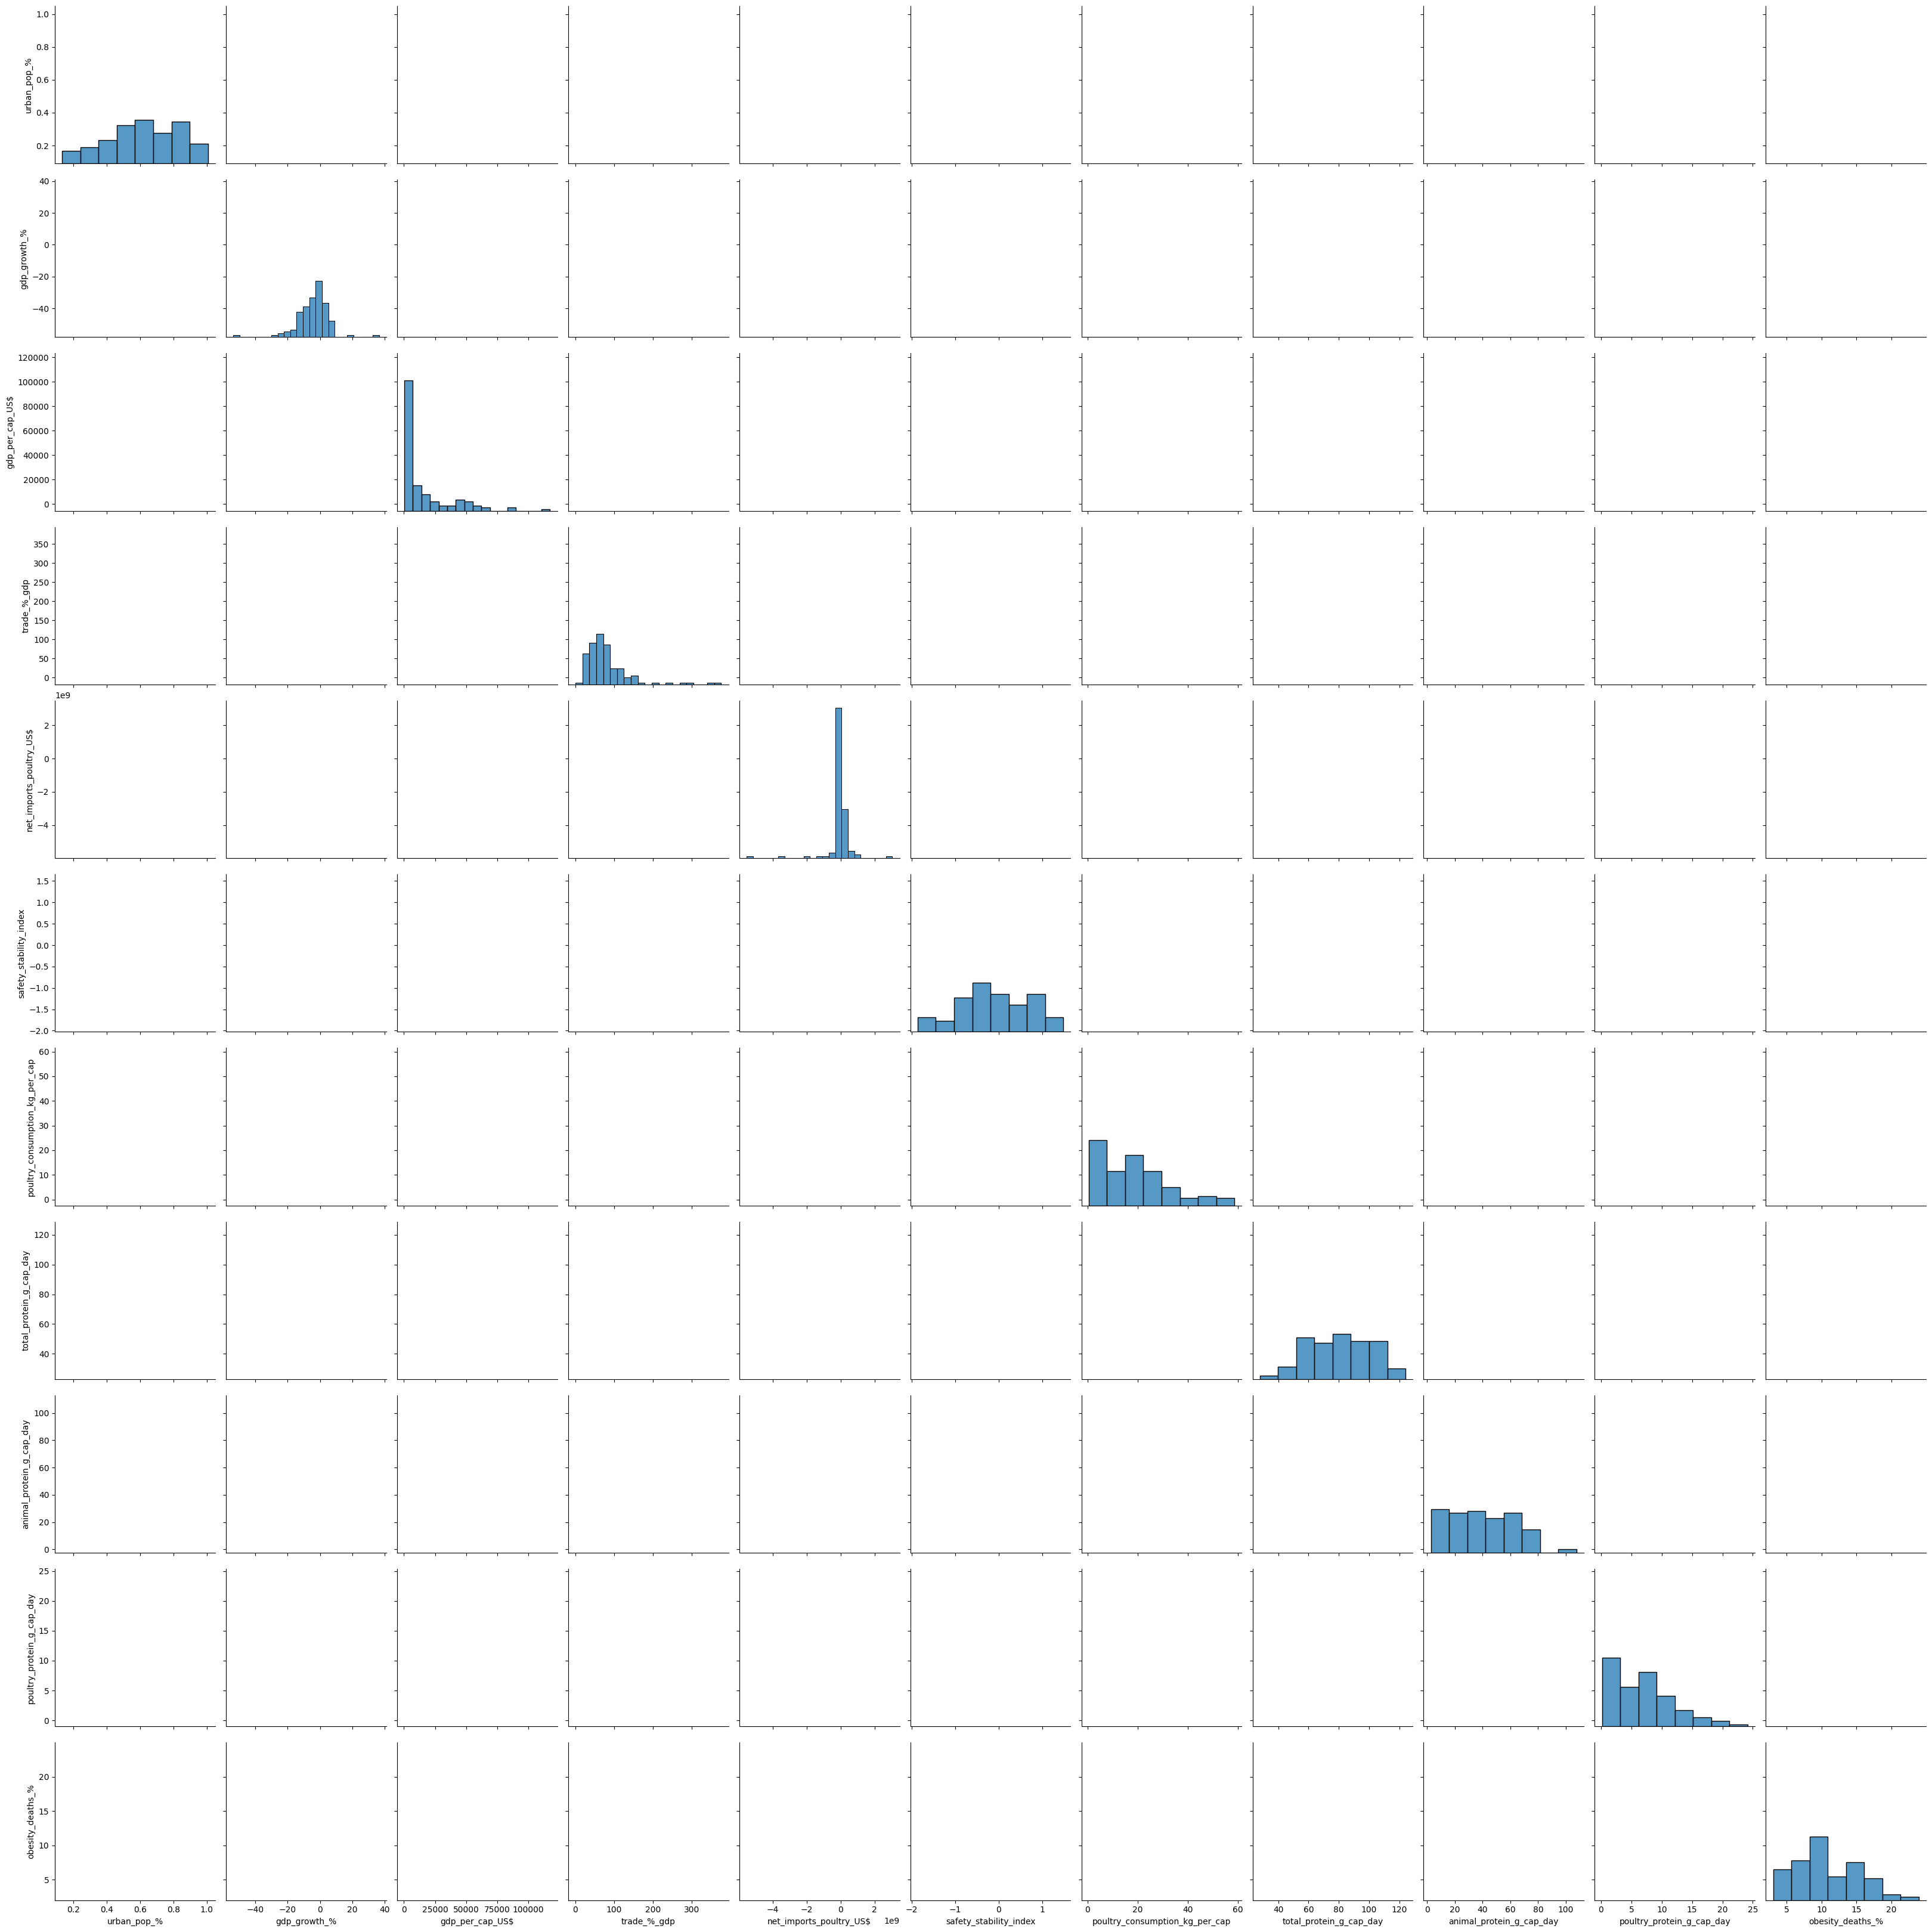

In [91]:
# compare correlation of chosen indicators in a pairplot
data_pairs = sns.pairplot(data_final, kind='scatter', height=3, diag_kind='auto',
                          markers="+", plot_kws= {'color': col,'alpha': 0.5})
plt.savefig("data_pairs.png")
plt.show()

#### Il existe une correlation lineaire visible graphiquement entre les proteines totales comsommees et les proteines de volaille consommees, ainsi qu'entre les quantites de volaille et de proteines de volaille consommees.
#### Un certain nombre d'autres variables semblent avoir des correlations monotones croissantes entre elles, comme le PIB par habitant et la consommation de proteines animales par exemple.